<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [9]:
# Answer:
movies.shape
print("The number of rows: ",movies.shape[0])
print("The number of columns: ",movies.shape[1])

The number of rows:  979
The number of columns:  6


#### Check the data type of each column.

In [12]:
# Answer:
pd.DataFrame(movies.dtypes, columns=['DataType'])

,DataType
star_rating,float64
title,object
content_rating,object
genre,object
duration,int64
actors_list,object


#### Calculate the average movie duration.

In [13]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [18]:
# Answer:
print('Top 5 longest movies')
movies.sort_values(by='duration', ascending=False).head()


Top 5 longest movies


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."


In [19]:
print('Top 5 shortest movies')
movies.sort_values(by='duration', ascending=True).head()

Top 5 shortest movies


,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

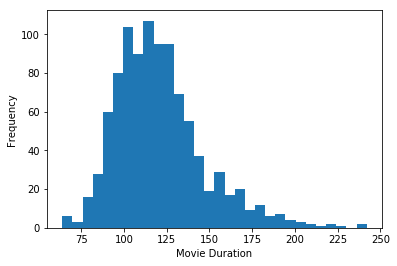

In [27]:
# Answer:
movies.duration.plot(kind='hist', bins=30);
plt.xlabel('Movie Duration');
plt.ylabel('Frequency');

#### Use a box plot to display that same data.

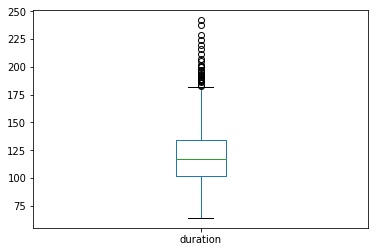

In [26]:
# Answer:
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [33]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [36]:
b=movies['content_rating'].value_counts().sum()
print("Total Number of movies that have had content ratings: ", b)

Number of movies that have had content ratings:  976


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Ratings Comparison')

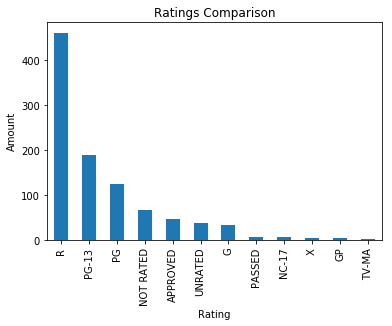

In [50]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar');
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.title('Ratings Comparison')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [53]:
# Answer:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)
movies.content_rating.head(10)

0          R
1          R
2          R
3      PG-13
4          R
5    UNRATED
6    UNRATED
7      PG-13
8          R
9          R
Name: content_rating, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [54]:
# Answer:
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

#### Count the number of missing values in each column.

In [58]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [60]:
# Answer:
movies.content_rating.fillna('Missing_rated', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [63]:
# Answer:
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [62]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

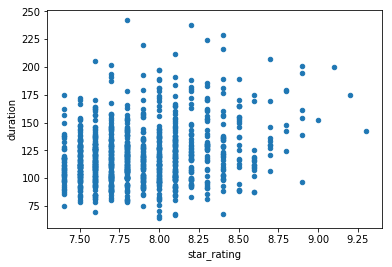

In [66]:
# Answer:
movies.plot(kind='scatter', x='star_rating', y='duration')

#### Calculate the average duration for each genre.

In [67]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017822847048>,
      dtype=object)

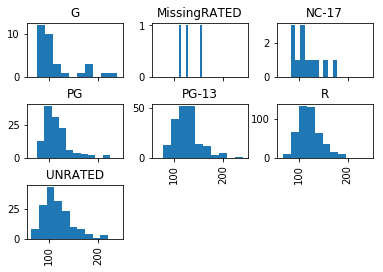

In [70]:
# Answer:

movies.duration.hist(by=movies.content_rating, sharex=True)

#### Determine the top rated movie (by star rating) for each genre.

In [76]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()


genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [6]:
# Answer:
movies.genre.value_counts()
relevant_genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Crime', 'Drama', 'Family', 'Horror', 'Sci-Fi']
movies[movies.genre.isin(relevant_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Crime        7.916935
Drama        7.902518
Family       7.850000
Horror       7.806897
Sci-Fi       7.920000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!